# 引入套件

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# seaborn 基本操作
https://seaborn.pydata.org/

## seaborn 把幾個比較常見的作圖方式分成下面三大類。舉例來說，我要畫 violinplot 的話，我就會呼叫 catplot 這個 function，並把裡面的 kind 參數改為 violinplot。

![picture](https://drive.google.com/uc?id=1aGRZ54Z784YGCcmb_5wGTgKBj0J0NxfN)

## 散佈圖

In [ ]:
# 讀取 seaborn 裡內建的範例資料集
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


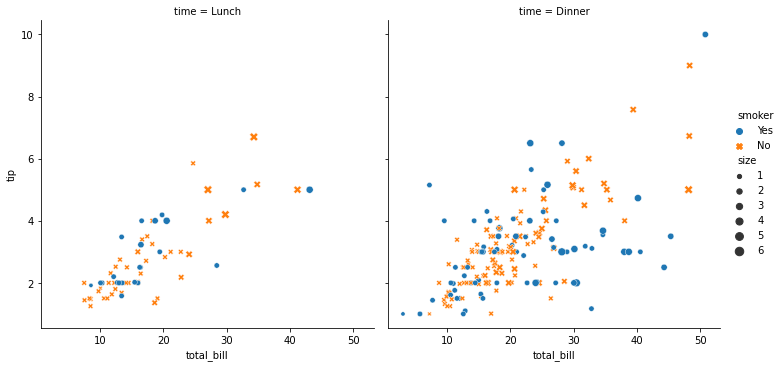

In [ ]:
# relplot 預設會畫散佈圖，且可以額外給其他參數，透過顏色、樣式、大小等方式呈現數據
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", style="smoker", size="size")
plt.show()

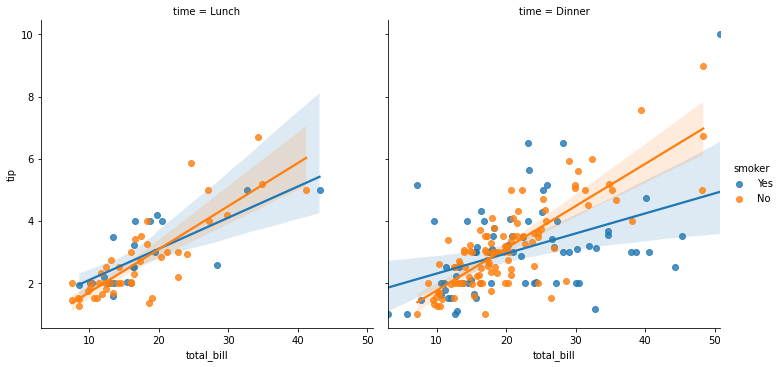

In [ ]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

## 折線圖

In [ ]:
# relplot 預設會畫散佈圖，且可以額外給其他參數，透過顏色、樣式、大小等方式呈現數據
dots = sns.load_dataset("dots")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


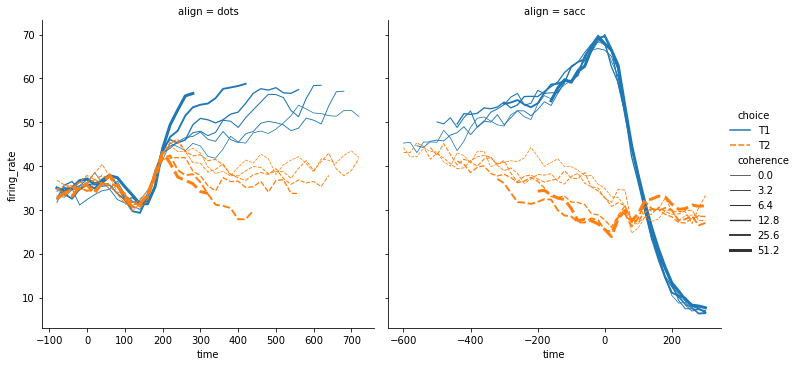

In [ ]:
# relplot 的 kind 參數設成 line 就可以畫折線圖，設定 facet_kws=dict(sharex=False) 可以讓 x 軸有不同的數值區間
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)
plt.show()

In [ ]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


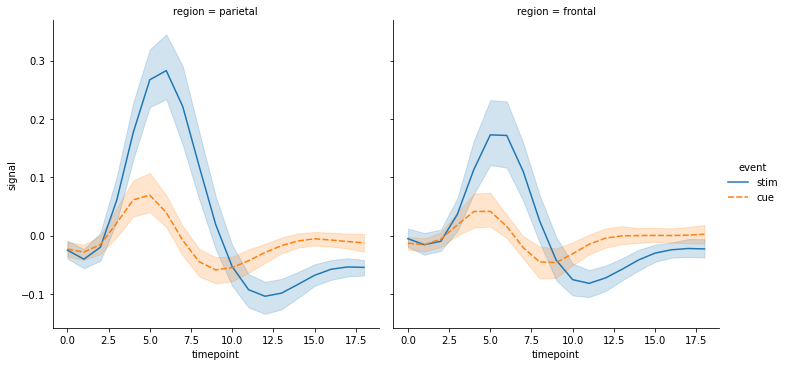

In [ ]:
# 用 relplot 的時候如果同一個 x 對應多個 y，他會幫你算出平均值畫出來，並畫出一個淺色的 95% 信賴區間
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)
plt.show()

## 直方圖

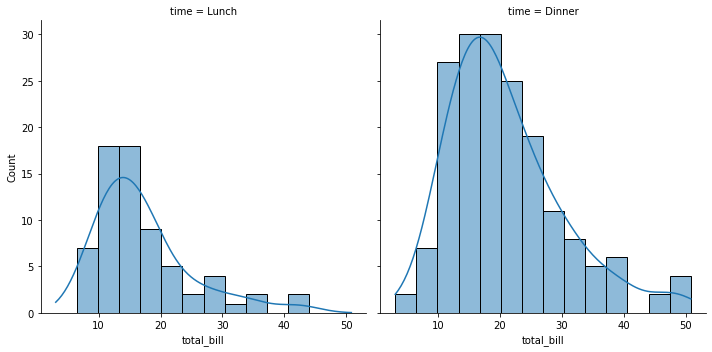

In [ ]:
# displot 可以畫出直方圖，kde 設成 True 的話，他會畫出一條線估計各個數值出現的機率
sns.displot(data = tips, x="total_bill", col="time", kde=True)
plt.show()

## 長條圖

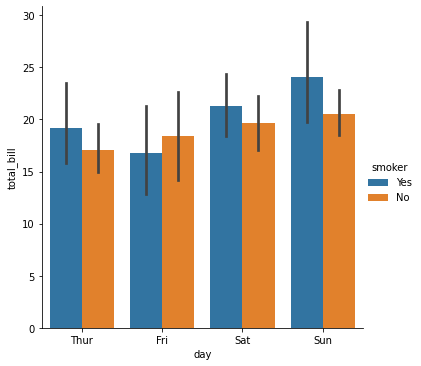

In [ ]:
# catplot裡面有多種專門為類別型資料設定的作圖方式，kind 設成 bar 就能畫長條圖
# 圖裡的 y 軸代表在這個類別下的 total_bill 平均值，黑色的線則是信賴區間
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")
plt.show()

## 一次呈現多種類型的圖

In [ ]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


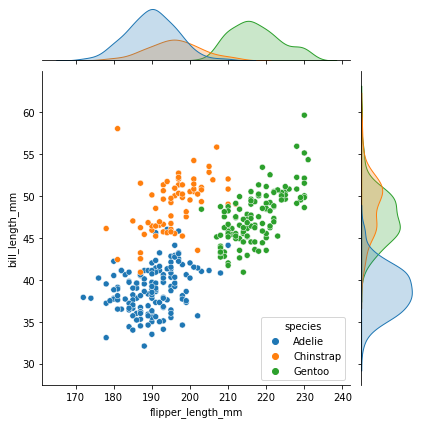

In [ ]:
# jointplot 可以畫出散佈圖，並在 X 軸和 Y 軸分別畫出他們的 kde
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

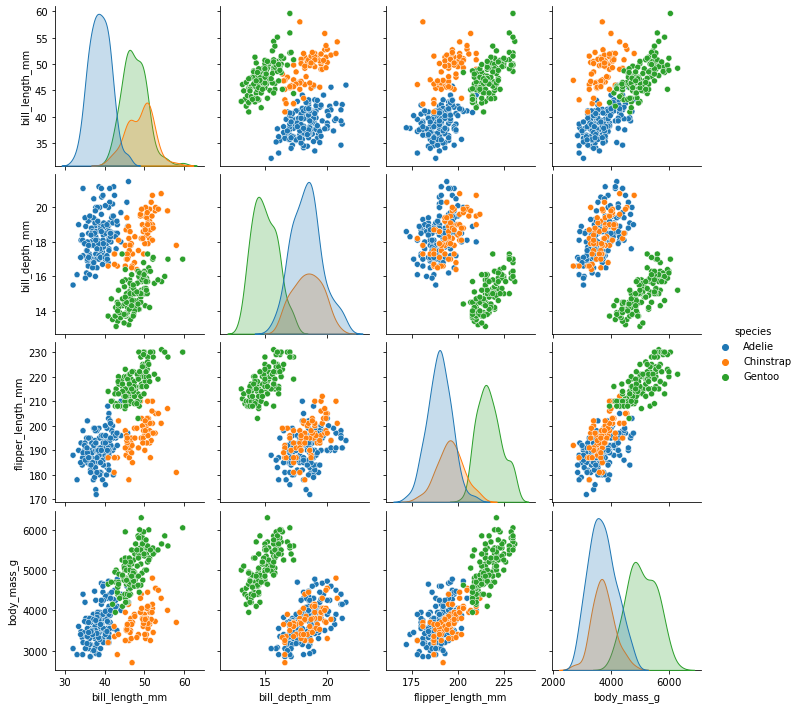

In [ ]:
# pairplot 會畫出斜對角是 kde，其他位置是各個 feature 之間的散佈圖
sns.pairplot(data=penguins, hue="species")
plt.show()